In [34]:
from itertools import chain

import numpy as np
import pandas as pd

from plot_utils import setDefault

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import clear_output

sns.set_style("darkgrid")


In [2]:
#setDefault(figsize=(20,10))
current_palette = sns.color_palette('pastel', 5)

In [3]:
mc_results = [893, 727, 672, 665, 689, 692, 514, 678, 483, 488, 413, 399, 315, 342, 412, 191, 226, 182, 179, 136, 112, 97, 98, 79, 55, 50, 43, 39, 31, 19, 18, 15, 14, 3, 12, 4, 4, 2, 1, 3, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0]
mc_results_long = [[i]* mc_results[i] for i in range(len(mc_results))]

sarsa_results = [649, 548, 723, 394, 592, 553, 442, 239, 406, 378, 494, 279, 364, 313, 360, 293, 291, 222, 223, 198, 212, 144, 143, 165, 108, 122, 139, 95, 90, 105, 73, 73, 57, 54, 57, 54, 35, 45, 35, 28, 28, 22, 19, 20, 17, 15, 14, 11, 3, 56]
sarsa_results_long = [[i]* sarsa_results[i] for i in range(len(sarsa_results))]

q_results = [672, 644, 520, 516, 571, 564, 534, 344, 474, 378, 352, 347, 291, 307, 325, 212, 236, 172, 270, 226, 183, 133, 154, 156, 149, 128, 102, 78, 79, 77, 84, 79, 62, 48, 63, 51, 65, 50, 32, 31, 23, 27, 24, 22, 23, 22, 13, 8, 4, 75]
q_results_long = [[i]* q_results[i] for i in range(len(q_results))]

dq_results = [610, 599, 604, 558, 586, 546, 455, 464, 455, 414, 382, 379, 394, 304, 257, 291, 265, 238, 208, 218, 179, 168, 154, 144, 135, 122, 117, 92, 91, 59, 68, 49, 56, 46, 47, 35, 34, 19, 25, 23, 18, 11, 12, 10, 14, 6, 4, 2, 10, 23]
dq_results_long = [[i]* dq_results[i] for i in range(len(dq_results))]

rule_results = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 474, 481, 402, 366, 328, 338, 275, 276, 261, 197, 199, 189, 175, 176, 160, 189, 150, 141, 150, 125, 116, 111, 111, 106, 107, 74, 90, 81, 94, 84, 3973]
rule_results_long = [[i]* rule_results[i] for i in range(len(rule_results))]

res_df = pd.DataFrame({"mc_idx":list(chain(*mc_results_long)),
                      "sarsa_idx":list(chain(*sarsa_results_long)),
                      "q_idx":list(chain(*q_results_long)),
                      "dq_idx":list(chain(*dq_results_long)),
                      "rule_idx":list(chain(*rule_results_long))})

res_df_long = pd.melt(res_df, var_name='agent', value_name='idx')

In [20]:
agent_names = ["MCMC", "SARSA", "Q-learning", "Deep Q-learning", "Optimal"]

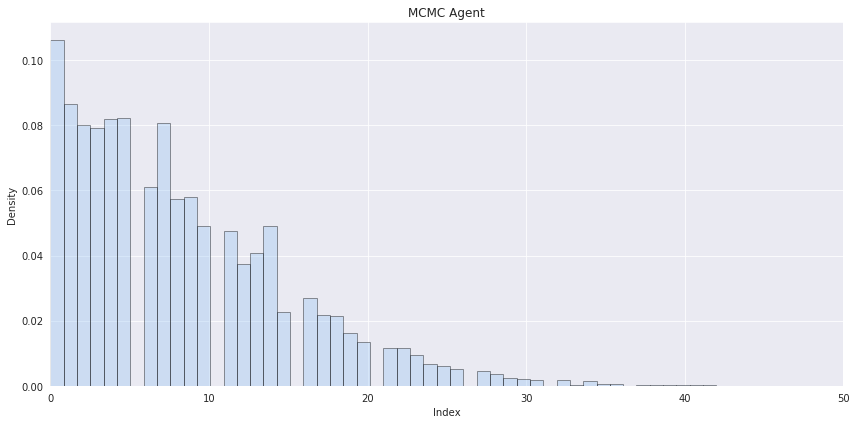

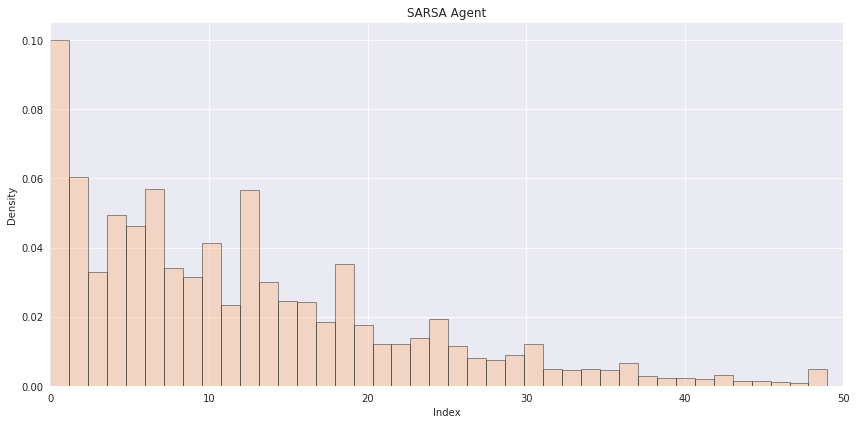

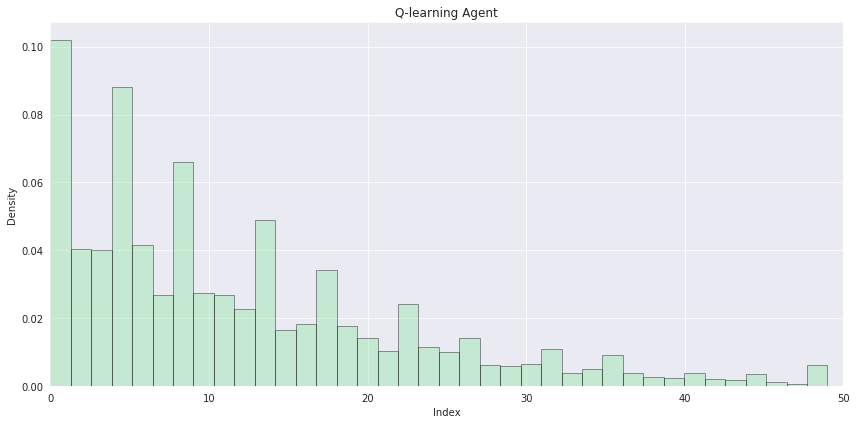

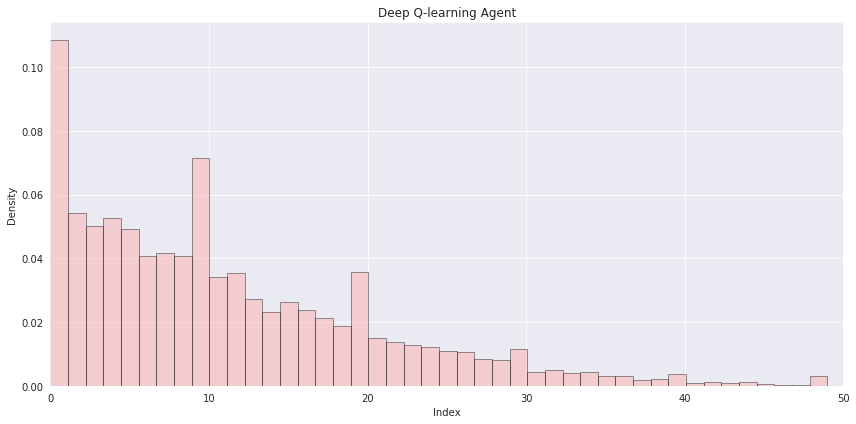

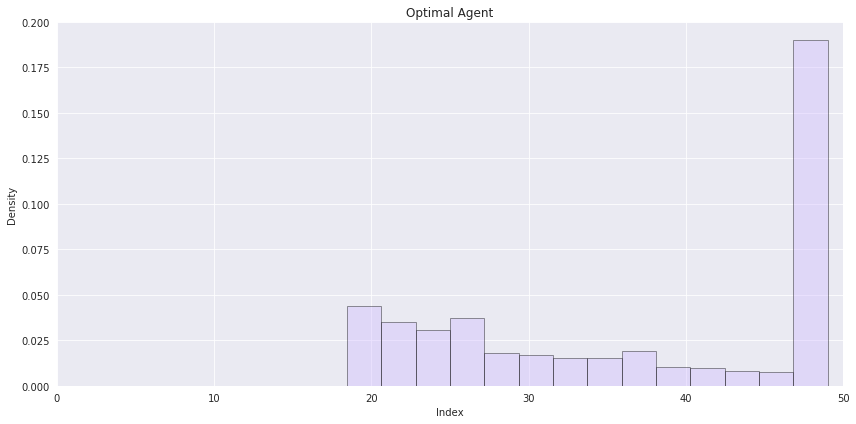

In [35]:

#fig.suptitle('Final Index Over 10,000 Evaluation Games', y=1.02, fontsize=20)

for i, col in enumerate(res_df):
    fig = plt.figure(figsize=(12,6))
    sns.distplot(res_df[col], hist=True, kde=False, norm_hist=True, 
                 color=current_palette[i],
                 hist_kws={'edgecolor':'black'}, 
                 label=agent_names[i],
                 axlabel='Index')
    plt.xlim((0, 50))
    plt.xlabel("Index")
    plt.ylabel("Density")
    plt.title("{} Agent".format(agent_names[i]))
    fig.tight_layout()
    fig.savefig("viz/hist/{}_agent.png".format(col.split("_")[0]))

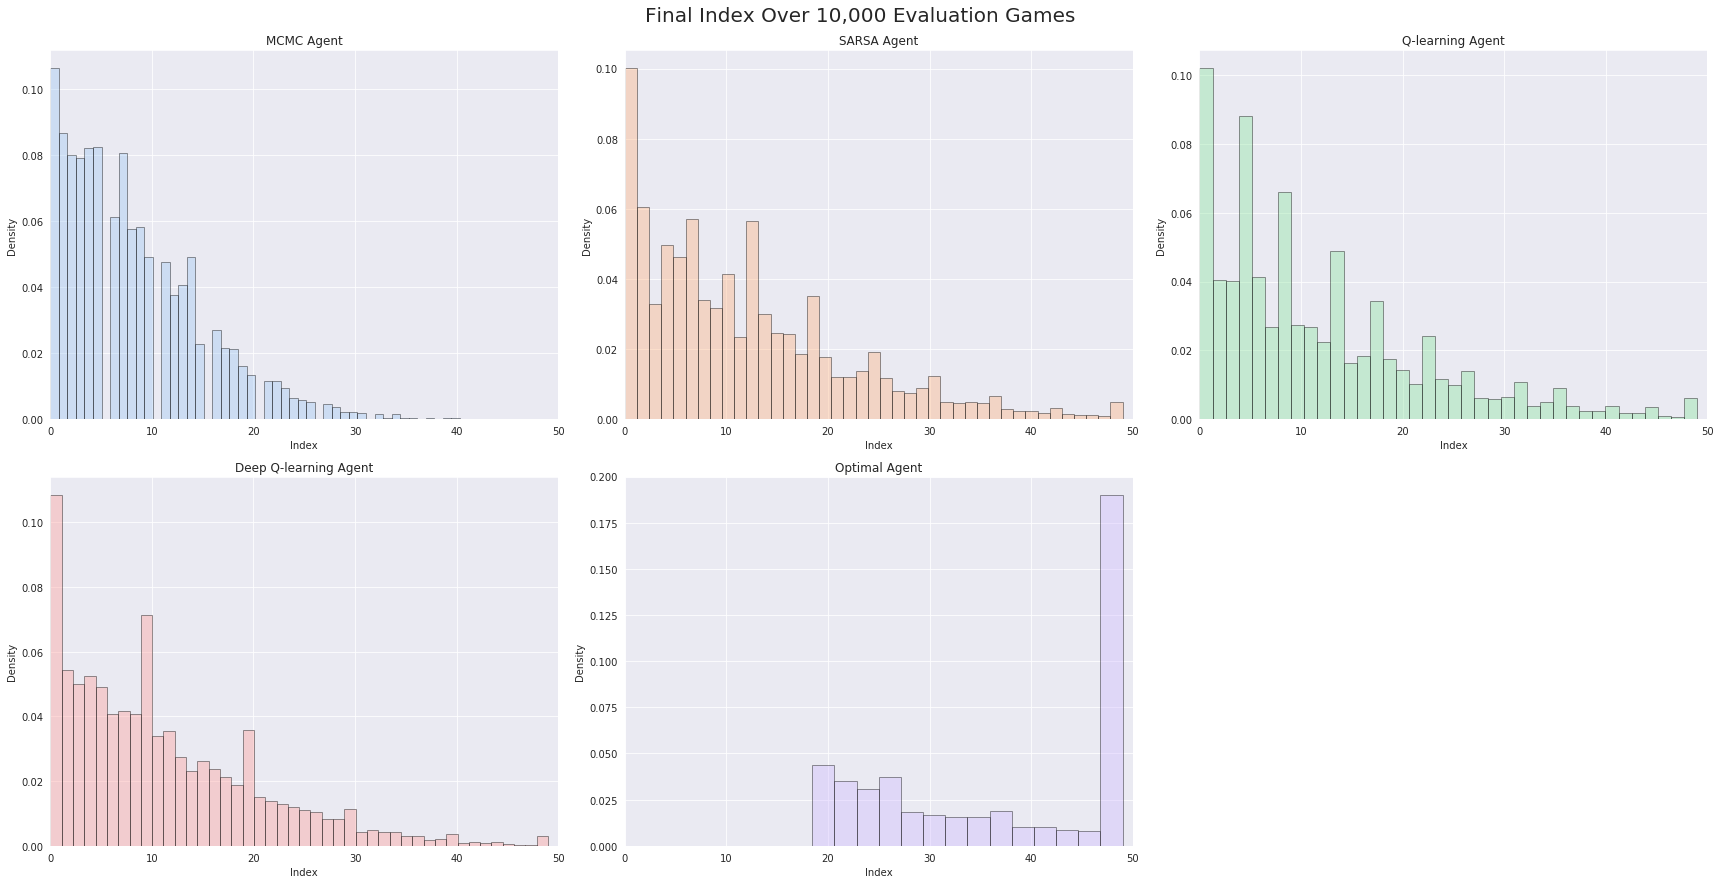

In [36]:
fig = plt.figure(figsize=(24,12))
fig.suptitle('Final Index Over 10,000 Evaluation Games', y=1.02, fontsize=20)

for i, col in enumerate(res_df):
    fig.add_subplot(2, 3, i+1, 
                    title='{} Agent'.format(agent_names[i]),
                    xlabel='Index',
                    ylabel='Density',
                    xlim=(0,50))
    sns.distplot(res_df[col], hist=True, kde=False, norm_hist=True, 
                 color=current_palette[i],
                 hist_kws={'edgecolor':'black'}, 
                 label=agent_names[i],
                 axlabel='Index')

fig.tight_layout()
fig.savefig("viz/hist/hist_facet.png")

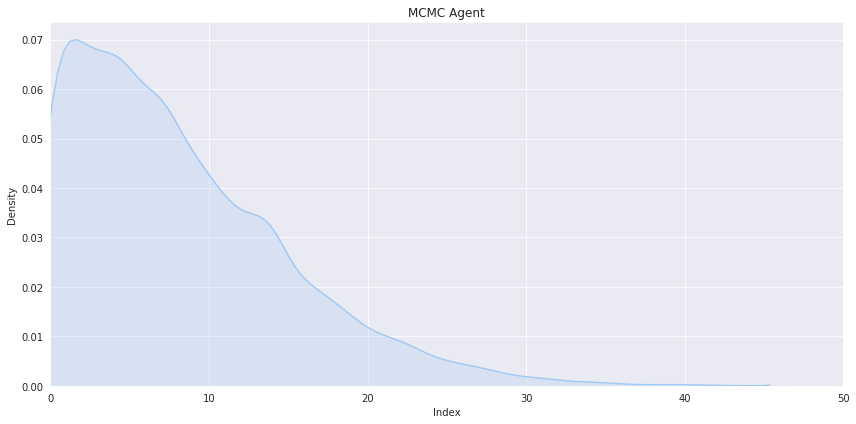

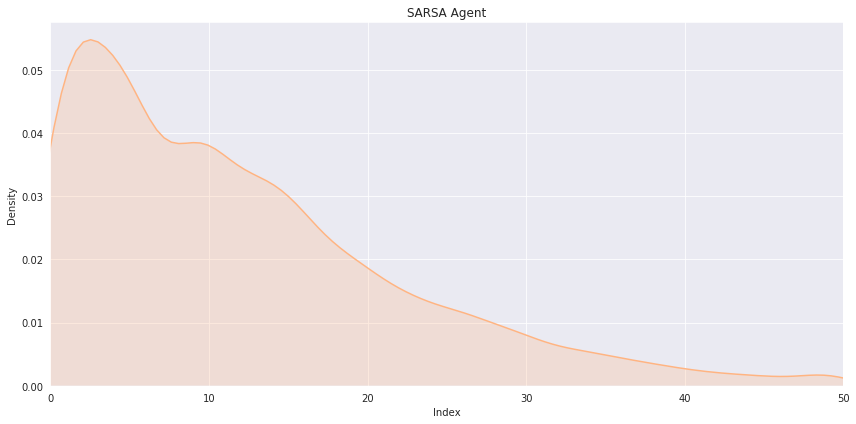

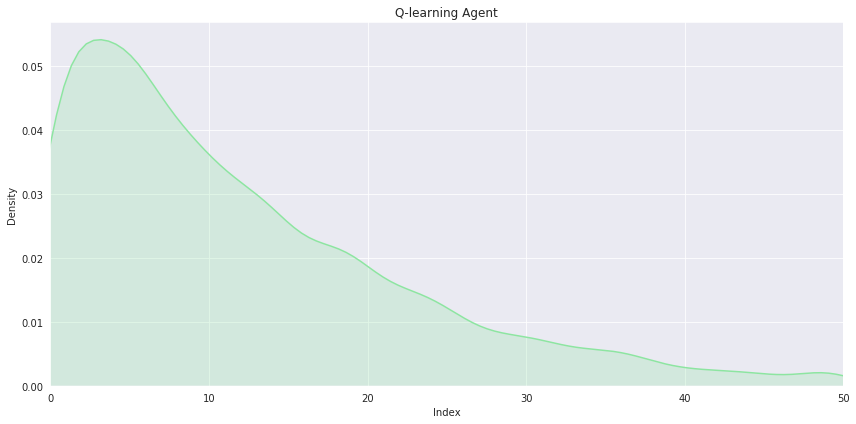

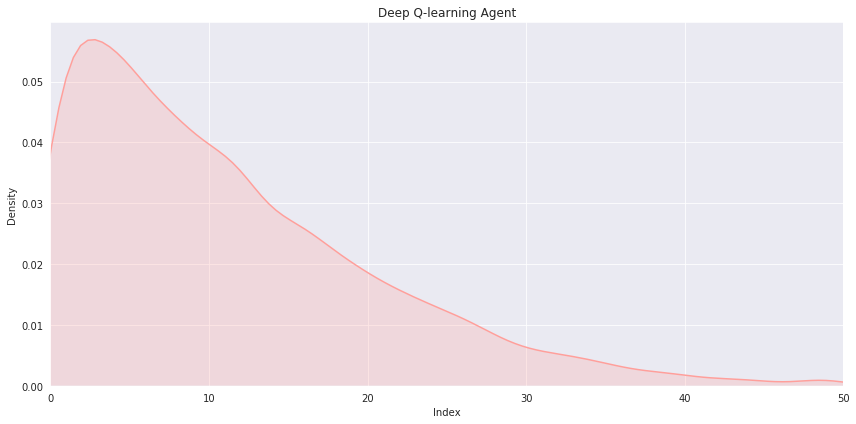

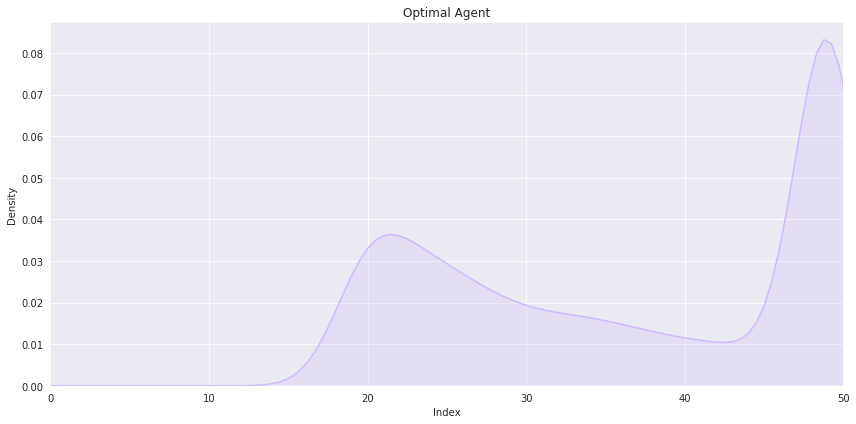

In [37]:

#fig.suptitle('Final Index Over 10,000 Evaluation Games', y=1.02, fontsize=20)

for i, col in enumerate(res_df):
    fig = plt.figure(figsize=(12,6))
    sns.distplot(res_df[col], hist=False,
                 color=current_palette[i],
                 kde_kws={'shade':True}, 
                 axlabel='Index')
    plt.xlim((0, 50))
    plt.xlabel("Index")
    plt.ylabel("Density")
    plt.title("{} Agent".format(agent_names[i]))
    fig.tight_layout()
    fig.savefig("viz/density/{}_agent.png".format(col.split("_")[0]))

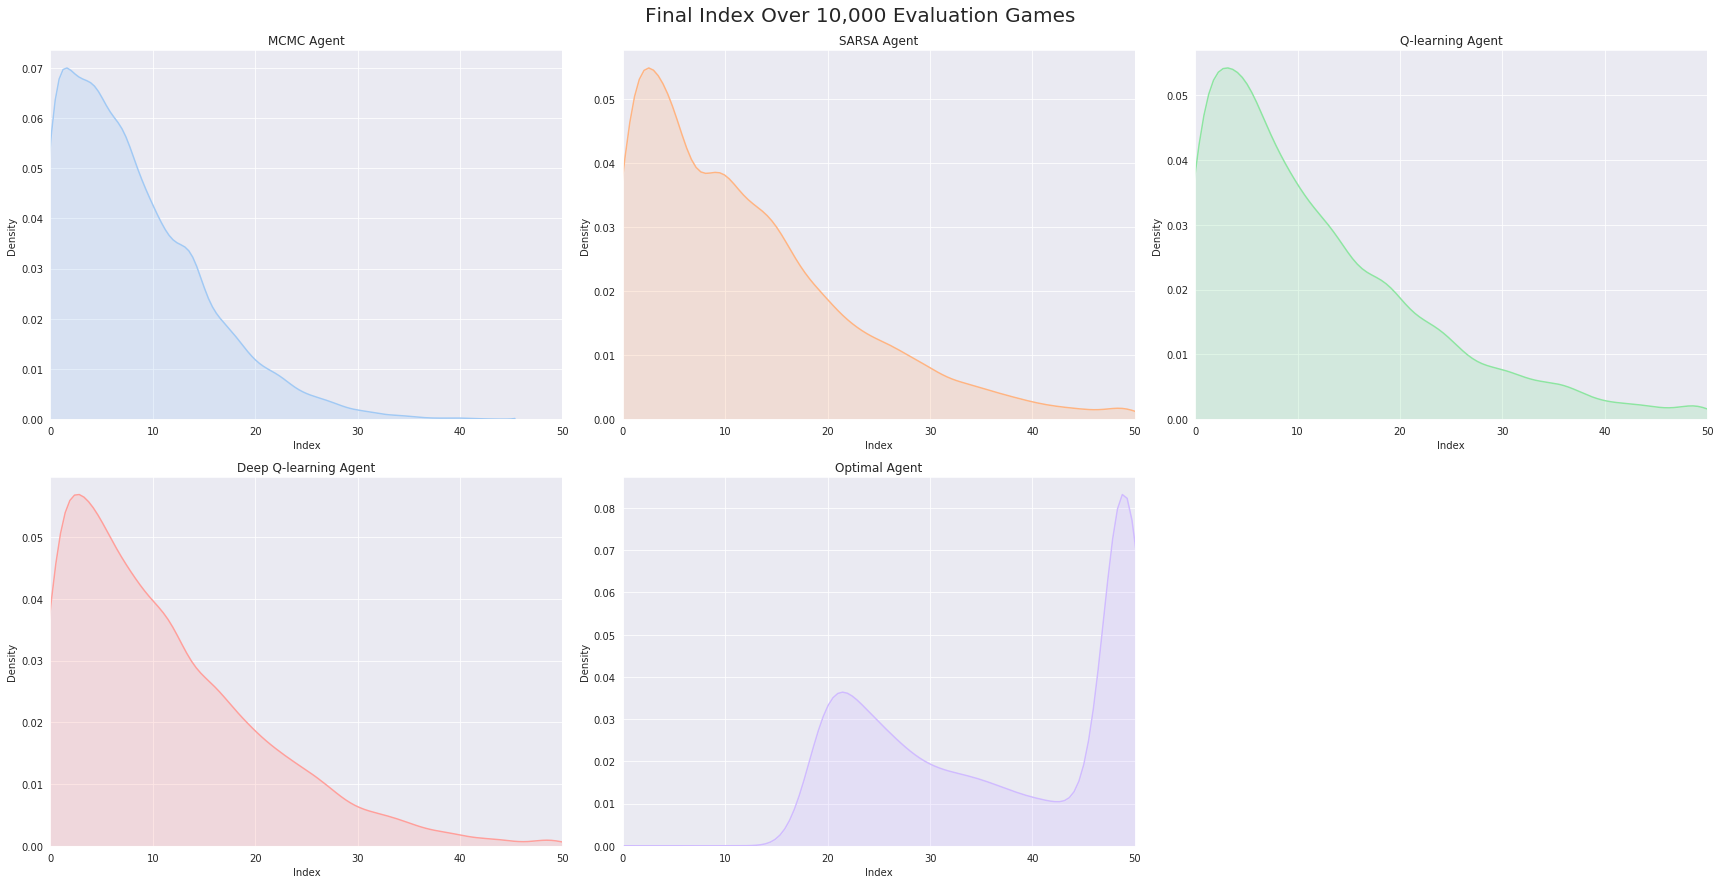

In [38]:
fig = plt.figure(figsize=(24,12))


for i, col in enumerate(res_df):
    fig.add_subplot(2, 3, i+1, 
                    title='{} Agent'.format(agent_names[i]),
                    xlabel='Index',
                    ylabel='Density',
                    xlim=(0, 50))
    sns.distplot(res_df[col], hist=False,
                 color=current_palette[i],
                 kde_kws={'shade':True}, 
                 axlabel='Index')

fig.tight_layout()
fig.suptitle('Final Index Over 10,000 Evaluation Games', y=1.02, fontsize=20)
fig.savefig("viz/density/density_facet.png")

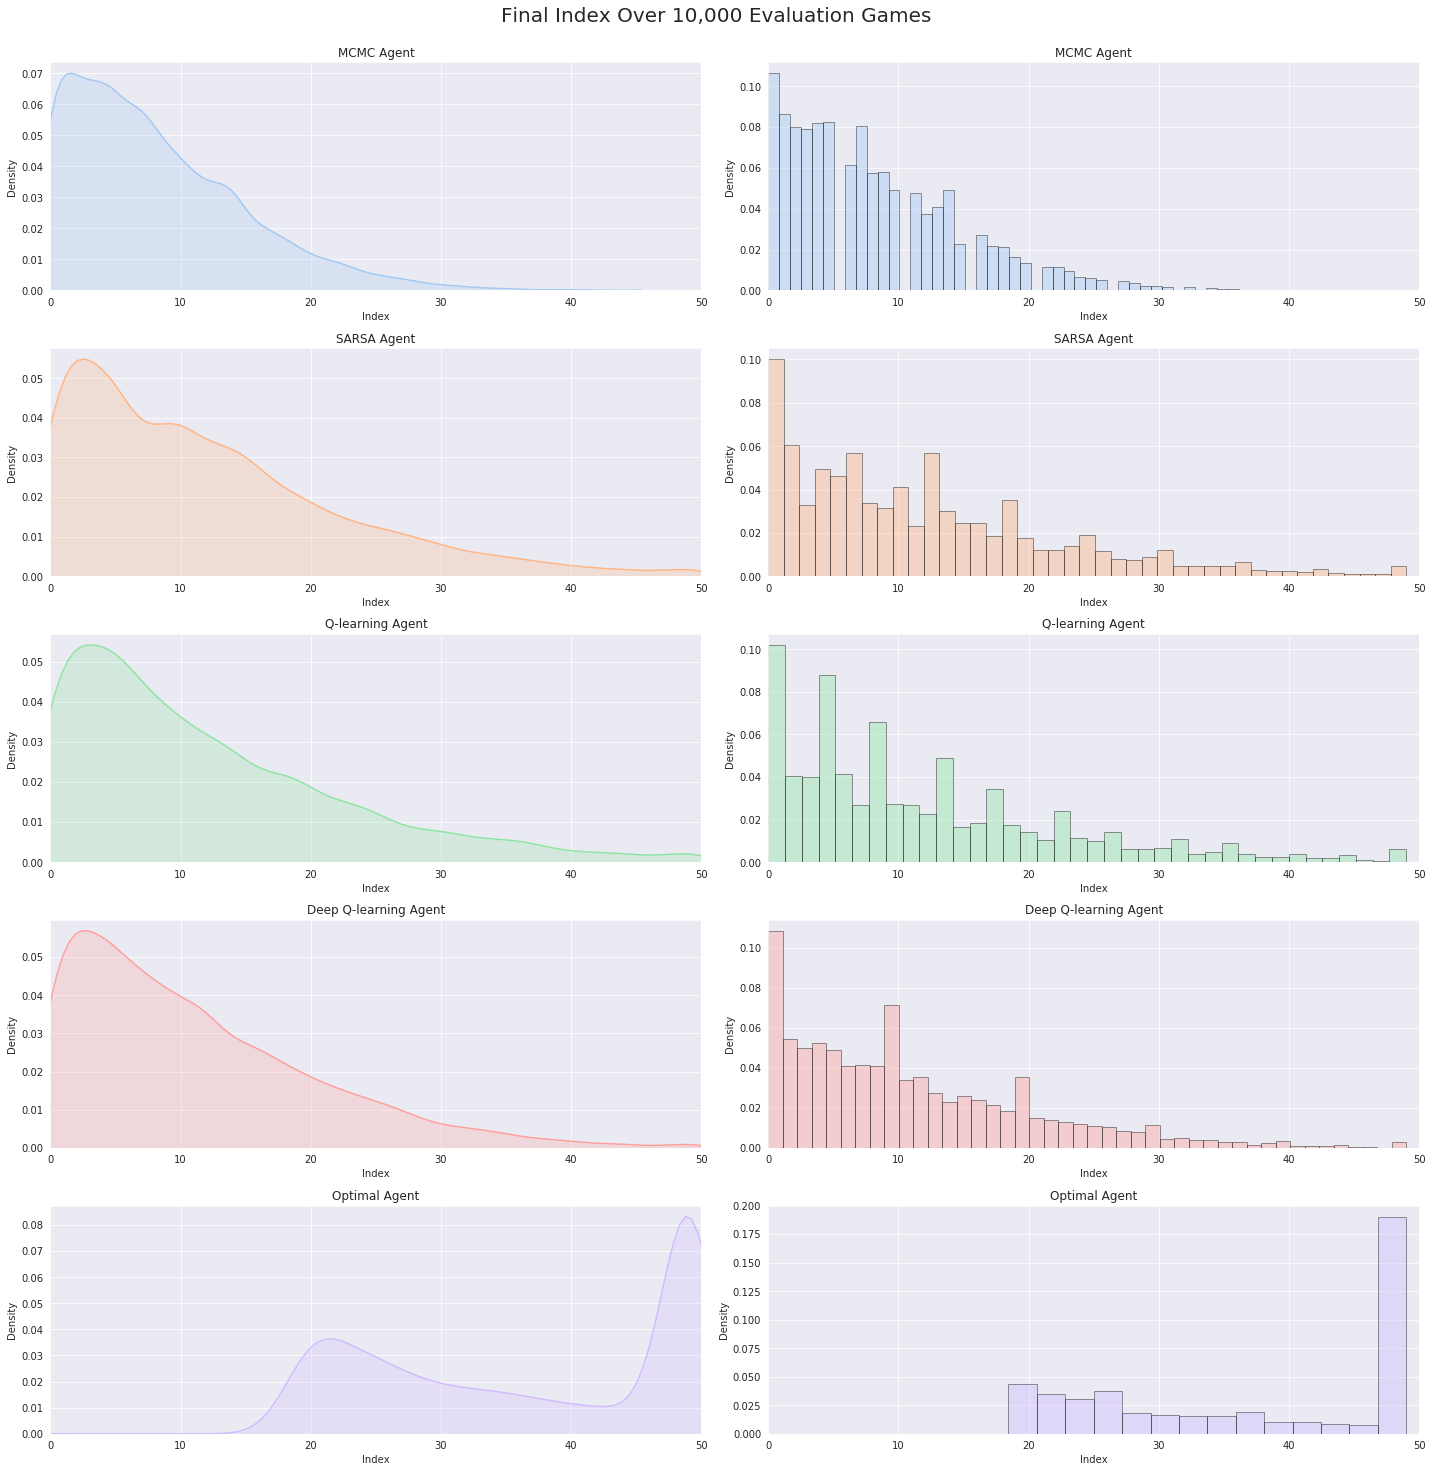

In [39]:
fig = plt.figure(figsize=(20,20))
fig.suptitle('Final Index Over 10,000 Evaluation Games', y=1.02, fontsize=20)

for i, col in enumerate(res_df):
    fig.add_subplot(5, 2, 2*i+1, 
                    title='{} Agent'.format(agent_names[i]),
                    xlabel='Index',
                    ylabel='Density',
                    xlim=(0,50))
    sns.distplot(res_df[col], hist=False,
                 color=current_palette[i],
                 kde_kws={'shade':True}, 
                 axlabel='Index')
    fig.add_subplot(5, 2, 2*i+2, 
                    title='{} Agent'.format(agent_names[i]),
                    xlabel='Index',
                    ylabel='Density',
                    xlim=(0,50))
    sns.distplot(res_df[col], hist=True, kde=False, norm_hist=True, 
                 color=current_palette[i],
                 hist_kws={'edgecolor':'black'},
                 axlabel='Index')

#fig.subplots_adjust(top=0.85)
fig.tight_layout()
fig.savefig("viz/hist_density_combined.png")

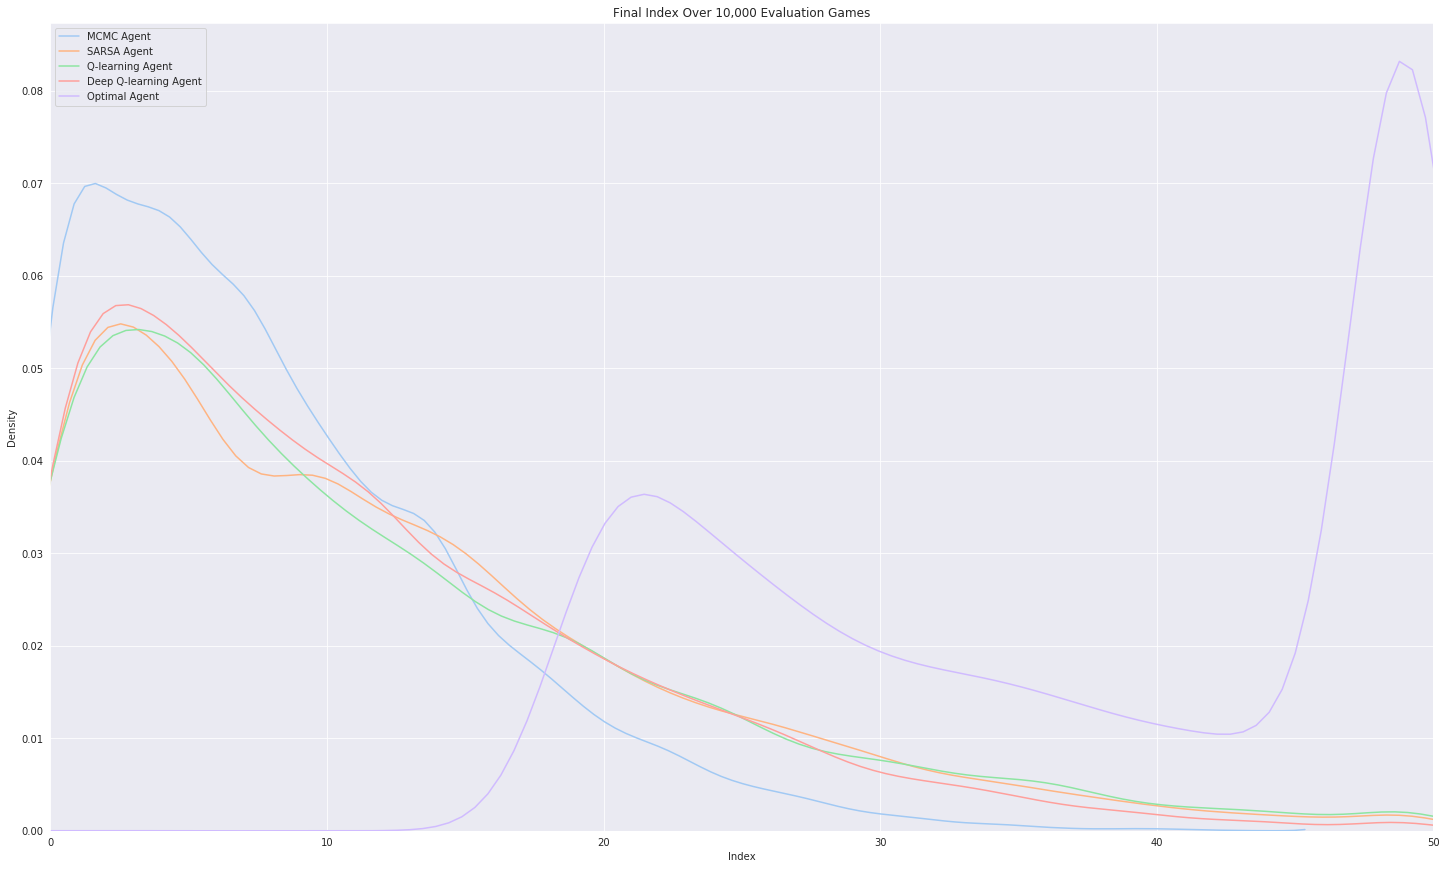

In [43]:
fig = plt.figure(figsize=(20,12))

for i, col in enumerate(res_df):
    sns.distplot(res_df[col], hist = False,
                 color=current_palette[i],
                 label='{} Agent'.format(agent_names[i]),
                 axlabel='Index')
    
plt.xlim((0, 50))
plt.tight_layout()
plt.title('Final Index Over 10,000 Evaluation Games')
plt.xlabel('Index')
plt.ylabel('Density')
plt.legend()
fig.savefig("viz/density/density_combined.png")

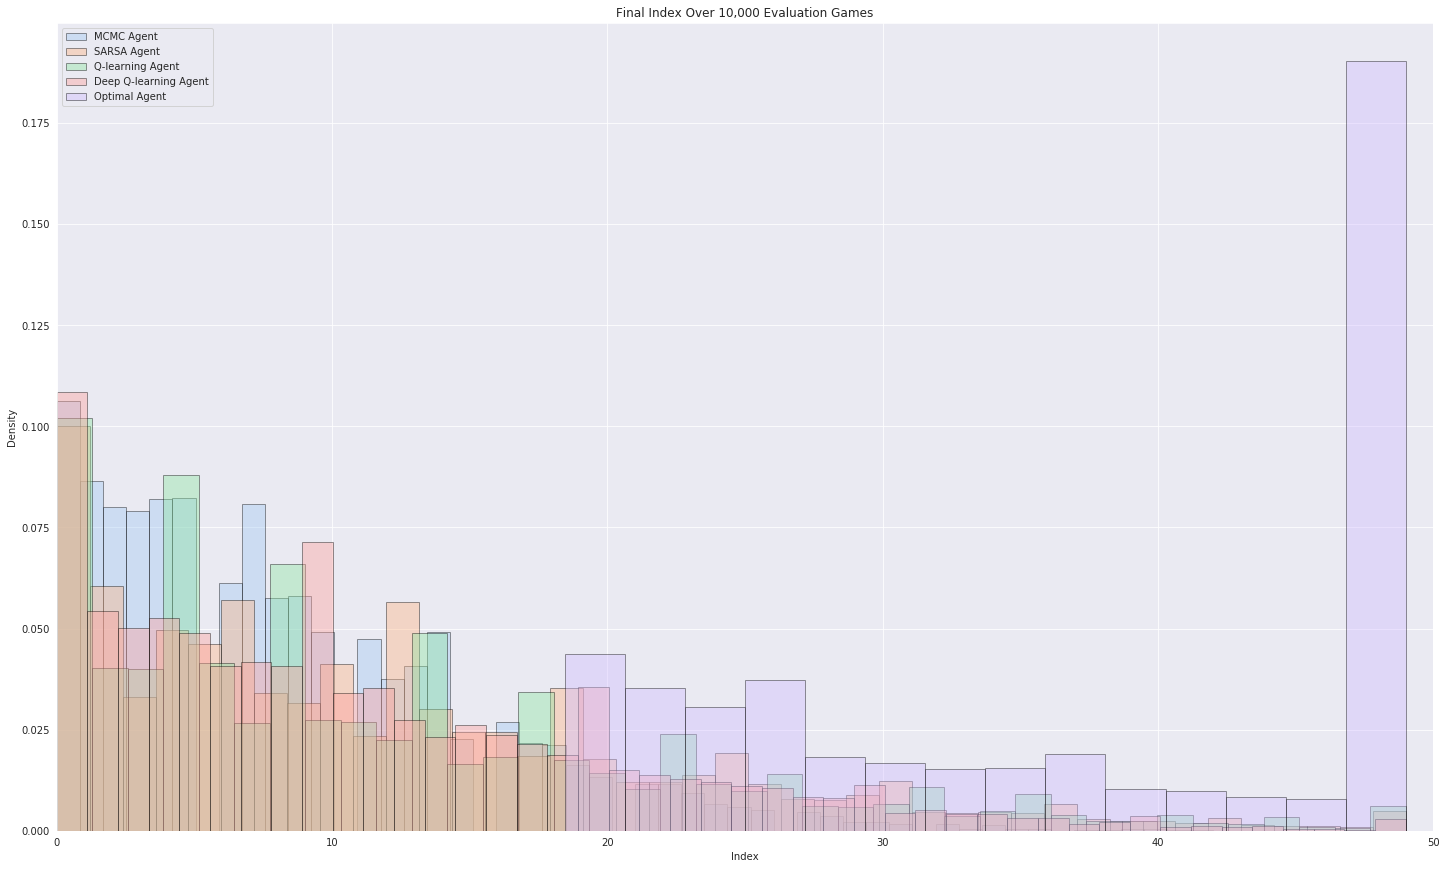

In [41]:
fig = plt.figure(figsize=(20,12))

for i, col in enumerate(res_df):
    sns.distplot(res_df[col], hist = True, kde=False, norm_hist=True, 
                 color=current_palette[i],
                 label='{} Agent'.format(agent_names[i]),
                 hist_kws={'edgecolor':'black'},
                 axlabel='Index')
    
plt.xlim((0, 50))
plt.tight_layout()
plt.title('Final Index Over 10,000 Evaluation Games')
plt.xlabel('Index')
plt.ylabel('Density')
plt.legend()
fig.savefig("viz/hist/hist_combined.png")